### 온열질환자 범주별 예측
#### - 1-dimensional binning
- 밀도 기반의 binning 진행
#### - 2-dimensional binning
- K-NN을 이용한 clustering 진행
  : 환자수&기온, 환자수&습구온도
#### - 3. Jenks natural breaks

In [1]:
import pandas as pd
import numpy as np
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.inspection import permutation_importance
from sklearn.cluster import KMeans
import jenkspy

In [2]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

from keras.models import Sequential
from keras.layers import LSTM, Dense

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

from xgboost import XGBRegressor

In [3]:
path='D:/Work/002.code/jupyterNotebook/data/HEAT_TARGET/T_PATIENTS_DAILY_WHOLE_0731.csv'
df_raw=pd.read_csv(path)
df_raw.head(2)
df=df_raw.copy()
df=df.fillna(0)

#### 밀도기반의 patientCnt binning

In [4]:
# 데이터의 밀도에 따라 자동으로 bin을 설정
hist1, bin_edges1 = np.histogram(df_raw['patientsCnt'], bins='auto')

In [5]:
print(hist1)
print(bin_edges1)

[24909   779   199    64    22    22     6     0     1     1     3     0
     2     0     1     1]
[ 0.     4.875  9.75  14.625 19.5   24.375 29.25  34.125 39.    43.875
 48.75  53.625 58.5   63.375 68.25  73.125 78.   ]


In [6]:
count_hist=hist1.tolist()
range_hist=bin_edges1.tolist()

In [7]:
count_hist

[24909, 779, 199, 64, 22, 22, 6, 0, 1, 1, 3, 0, 2, 0, 1, 1]

In [8]:
range_hist

[0.0,
 4.875,
 9.75,
 14.625,
 19.5,
 24.375,
 29.25,
 34.125,
 39.0,
 43.875,
 48.75,
 53.625,
 58.5,
 63.375,
 68.25,
 73.125,
 78.0]

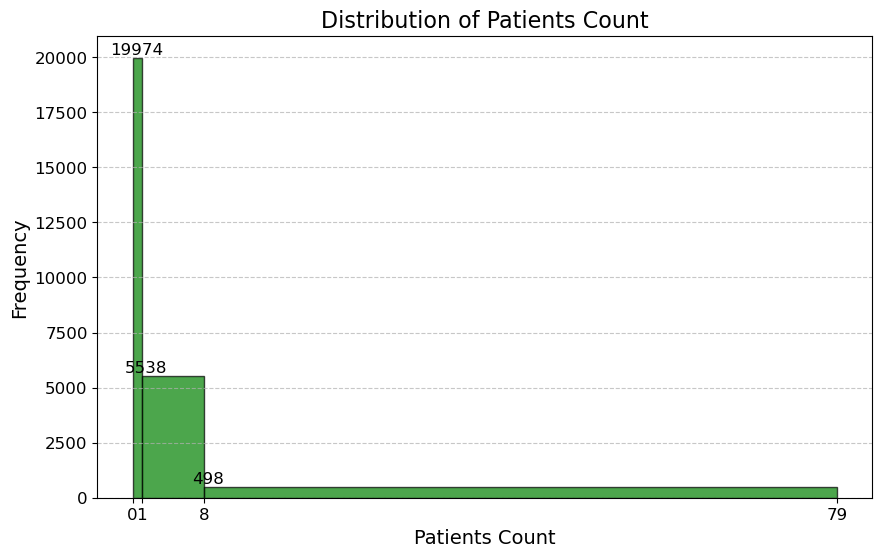

In [8]:
# 히스토그램 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 조정
counts, bins, patches = plt.hist(df['patientsCnt'], color='green', alpha=0.7, bins=[0, 1, 8, 79], edgecolor='black')

# 각 막대 위에 빈도 표시
for count, bin_edge in zip(counts, bins[:-1]):
    plt.text(bin_edge + (bins[1] - bins[0]) / 2, count, str(int(count)), 
             ha='center', va='bottom', fontsize=12)

# 그래프 제목 및 축 레이블 설정
plt.title('Distribution of Patients Count', fontsize=16)
plt.xlabel('Patients Count', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# x축과 y축 눈금 설정
plt.xticks([0, 1, 8, 79], fontsize=12)
plt.yticks(fontsize=12)

# 그리드 추가 (가독성 향상)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 그래프 출력
plt.show()

##### 0을 제외한 clustering

- max_ta case

In [9]:
from sklearn.cluster import KMeans

In [10]:
list=['create_date', 'sido_cd', 'max_ta', 'patientsCnt']
df_max_ta = df_raw[list]
# 0을 제외한 값들로 clustering 진행
df_max_ta = df_max_ta[df_max_ta['patientsCnt']!=0]
df_max_ta

# 6036개에 대한 clustering 수행
# KMeans 모델 초기화 및 학습
k=3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df_max_ta['max_ta_cluster'] = kmeans.fit_predict(df_max_ta[['max_ta', 'patientsCnt']]) + 1

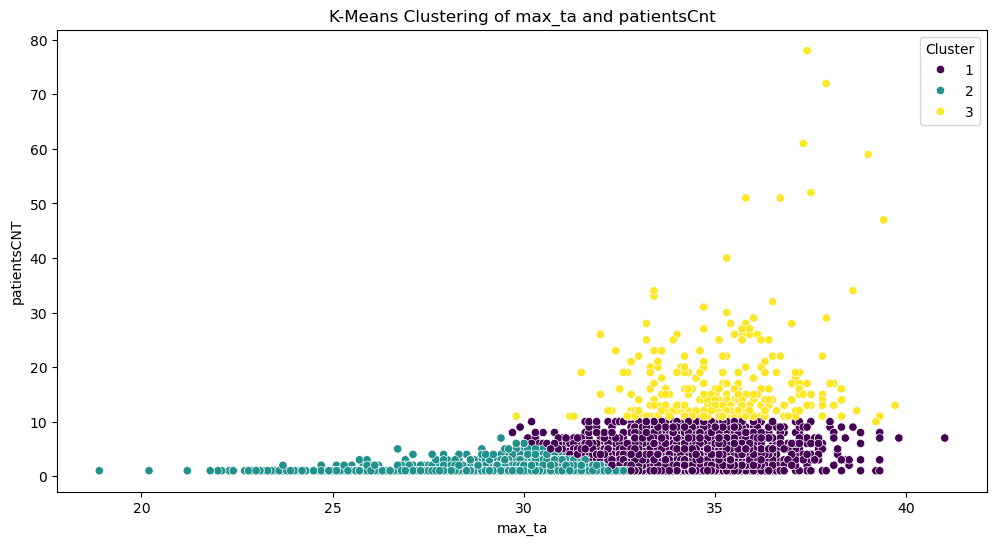

In [11]:
# 클러스터링 결과 시각화
plt.figure(figsize=(12, 6))
sns.scatterplot(x='max_ta', y='patientsCnt', hue='max_ta_cluster', data=df_max_ta, palette='viridis')
plt.title('K-Means Clustering of max_ta and patientsCnt')
plt.xlabel('max_ta')
plt.ylabel('patientsCNT')
plt.legend(title='Cluster')
plt.show()

- max_wbtemp case

In [12]:
list=['create_date', 'sido_cd', 'max_wbtemp', 'patientsCnt']
df_max_wbtemp = df_raw[list]
# 0을 제외한 값들로 clustering 진행
df_max_wbtemp = df_max_wbtemp[df_max_wbtemp['patientsCnt']!=0]
df_max_wbtemp

# 6036개에 대한 clustering 수행
# KMeans 모델 초기화 및 학습
k=3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df_max_wbtemp['max_wbtemp_cluster'] = kmeans.fit_predict(df_max_wbtemp[['max_wbtemp', 'patientsCnt']]) + 1

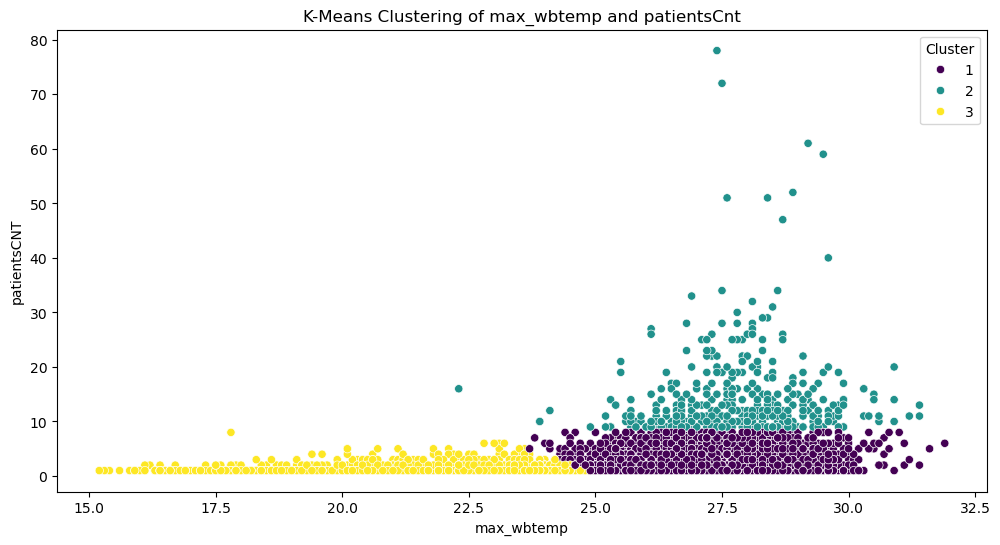

In [13]:
# 클러스터링 결과 시각화
plt.figure(figsize=(12, 6))
sns.scatterplot(x='max_wbtemp', y='patientsCnt', hue='max_wbtemp_cluster', data=df_max_wbtemp, palette='viridis')
plt.title('K-Means Clustering of max_wbtemp and patientsCnt')
plt.xlabel('max_wbtemp')
plt.ylabel('patientsCNT')
plt.legend(title='Cluster')
plt.show()

- max_tafeel case

In [14]:
list=['create_date', 'sido_cd', 'max_tafeel', 'patientsCnt']
df_max_tafeel = df_raw[list]
# 0을 제외한 값들로 clustering 진행
df_max_tafeel = df_max_tafeel[df_max_tafeel['patientsCnt']!=0]
df_max_tafeel

# 6036개에 대한 clustering 수행
# KMeans 모델 초기화 및 학습
k=3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df_max_tafeel['max_tafeel_cluster'] = kmeans.fit_predict(df_max_tafeel[['max_tafeel', 'patientsCnt']]) + 1 

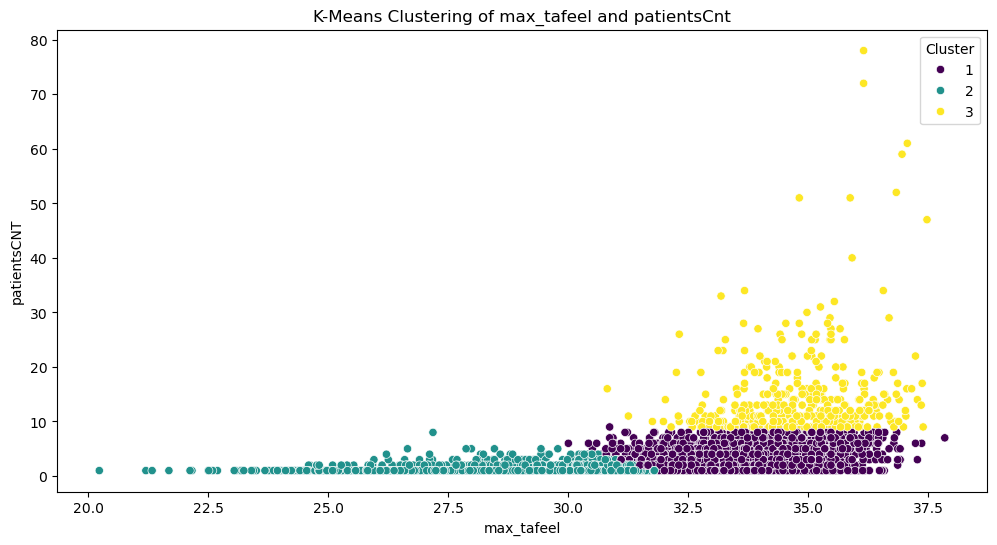

In [15]:
# 클러스터링 결과 시각화
plt.figure(figsize=(12, 6))
sns.scatterplot(x='max_tafeel', y='patientsCnt', hue='max_tafeel_cluster', data=df_max_tafeel, palette='viridis')
plt.title('K-Means Clustering of max_tafeel and patientsCnt')
plt.xlabel('max_tafeel')
plt.ylabel('patientsCNT')
plt.legend(title='Cluster')
plt.show()

- elbow_cluster

In [16]:
list1=['create_date', 'sido_cd', 'tropical_3days', 'max_ta', 'agriculture_man', 'agriculture_woman', 'patientsCnt']
# list2=['create_date', 'sido_cd', 'tropical_3days', 'max_ta', 'ta_max_pm', 'ta_max_six_pm2', 'patientsCnt']
df_elbow = df_raw[list1]
# 0을 제외한 값들로 clustering 진행
df_elbow = df_elbow[df_elbow['patientsCnt']!=0]
df_elbow

# 6036개에 대한 clustering 수행
# KMeans 모델 초기화 및 학습
k=3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df_elbow['elbow_cluster'] = kmeans.fit_predict(df_elbow[['tropical_3days', 'max_ta', 'agriculture_man', 'agriculture_woman', 'patientsCnt']]) + 1 
# df_elbow['elbow_cluster'] = kmeans.fit_predict(df_elbow[['tropical_3days', 'max_ta', 'ta_max_pm', 'ta_max_six_pm2', 'patientsCnt']]) + 1 

In [23]:
# wcss = []
# for i in range(1, 11):
#     k_means = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=15)  # n_init=10을 명시적으로 설정
#     k_means.fit(X)
#     wcss.append(k_means.inertia_)

# # Elbow Method 그래프 그리기
# plt.plot(np.arange(1, 11), wcss)
# plt.xlabel('Number of Clusters')
# plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
# plt.title('Elbow Method')
# plt.show()

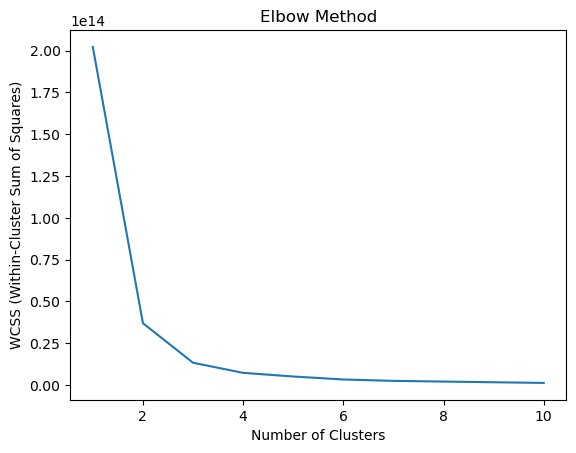

In [5]:
## 해당 그림은 scaling을 하지 않고 표현한 시각화임

### Jenks Cluster

In [4]:
jenks_non_zero=df[df['patientsCnt']!=0]

In [5]:
df_jenks = jenkspy.jenks_breaks(jenks_non_zero['patientsCnt'], n_classes=2)
print("Jenks Natural Breaks:", df_jenks)

Jenks Natural Breaks: [1, 8, 78]


In [6]:
# 최대 구간 수 지정 (임의로 설정)
max_classes = 10

# 변수를 초기화
best_breaks = None
min_variance = float('inf')

# 최적의 구간 수 찾기
for n_classes in range(2, max_classes + 1):
    breaks = jenkspy.jenks_breaks(jenks_non_zero['patientsCnt'], n_classes=n_classes)
    
    # 각 구간의 내부 분산 계산
    variance = sum([np.var(jenks_non_zero['patientsCnt'][(jenks_non_zero['patientsCnt'] >= breaks[i]) & (jenks_non_zero['patientsCnt'] <= breaks[i+1])]) 
                    for i in range(len(breaks)-1)])
    
    # 내부 분산이 최소인 경우 업데이트
    if variance < min_variance:
        min_variance = variance
        best_breaks = breaks

# 결과 출력
print("Best Jenks Natural Breaks:", best_breaks)
print(jenks_non_zero)

Best Jenks Natural Breaks: [1, 8, 78]
          sido create_date  sido_cd  weekend_yn  grid_x  grid_y  sat_x  sat_y  \
500      서울특별시  2014-05-30       11           0      60     127    0.0    0.0   
510        경기도  2014-05-31       31           1      60     120    0.0    0.0   
513    전북특별자치도  2014-05-31       35           1      63      89    0.0    0.0   
524      울산광역시  2014-05-31       26           1     102      84    0.0    0.0   
525       경상남도  2014-05-31       38           1      91      77    0.0    0.0   
...        ...         ...      ...         ...     ...     ...    ...    ...   
25812     전라남도  2023-09-19       36           0      51      67    0.0    0.0   
25820    울산광역시  2023-09-19       26           0     102      84    0.0    0.0   
25829     전라남도  2023-09-20       36           0      51      67    0.0    0.0   
25874      경기도  2023-09-23       31           1      60     120    0.0    0.0   
25898    서울특별시  2023-09-24       11           1      60     127    0.0 

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_10808\1528177640.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jenks_non_zero['jenks_cluster'] = pd.cut(jenks_non_zero['patientsCnt'], bins=best_breaks, labels=False, include_lowest=True)


In [5]:
breaks = [1, 8, 78]  # 구간 [1, 8, 78]

# 새로운 컬럼 추가
def assign_jenks_value(patientsCnt):
    if patientsCnt == 0:
        return 0
    elif 1 <= patientsCnt < 8:
        return breaks[0]
    elif 8 <= patientsCnt < 79:
        return breaks[1]
    else:
        return breaks[2]

In [6]:
df['jenks_cluster'] = df['patientsCnt'].apply(assign_jenks_value)
print(df.groupby('jenks_cluster').size())
mapping = {0: 0, 1: 1, 8: 2}
df['jenks_cluster'] = df['jenks_cluster'].map(mapping)

lst=['sido', 'create_date', 'sido_cd', 'weekend_yn', 'grid_x', 'grid_y', 'sat_x', 'sat_y', 'min_ta', 'max_ta', 'mean_ta', 'gap_ta', 'min_tafeel',
    'max_tafeel', 'mean_tafeel', 'gap_tafeel', 'min_hm', 'max_hm', 'mean_hm', 'gap_hm', 'min_wbtemp', 'max_wbtemp', 'mean_wbtemp',
    'gap_wbtemp', 'min_ws', 'max_ws', 'mean_ws', 'tropical_3days', 'heatwave_temp', 'heatalert_temp', 'ta_min_3days', 'ta_max_3days',
    'gap_ta_minmax', 'popular_man', 'popular_woman', 'agriculture_man',
    'agriculture_woman', 'ta_min_am', 'ta_max_am', 'ta_mean_am', 'ta_min_pm', 'ta_max_pm', 'ta_mean_pm', 'ta_min_six_am1',
    'ta_max_six_am1', 'ta_mean_six_am1', 'ta_min_six_am2', 'ta_max_six_am2',
    'ta_mean_six_am2', 'ta_min_six_pm1', 'ta_max_six_pm1', 'ta_mean_six_pm1', 'ta_min_six_pm2', 'ta_max_six_pm2',
    'ta_mean_six_pm2', 'patientsCnt', 'jenks_cluster', 'instDate', 'updtDate']
df=df[lst]

# df.to_csv('D:/Work/002.code/jupyterNotebook/data/HEAT_TARGET/T_PATIENTS_DAILY_WHOLE_0812.csv', encoding='utf-8-sig', index=False)

jenks_cluster
0    19974
1     5538
8      498
dtype: int64


               min  max       mean  count
jenks_cluster                            
0                1    8   2.248757   5632
1                9   78  14.477723    404


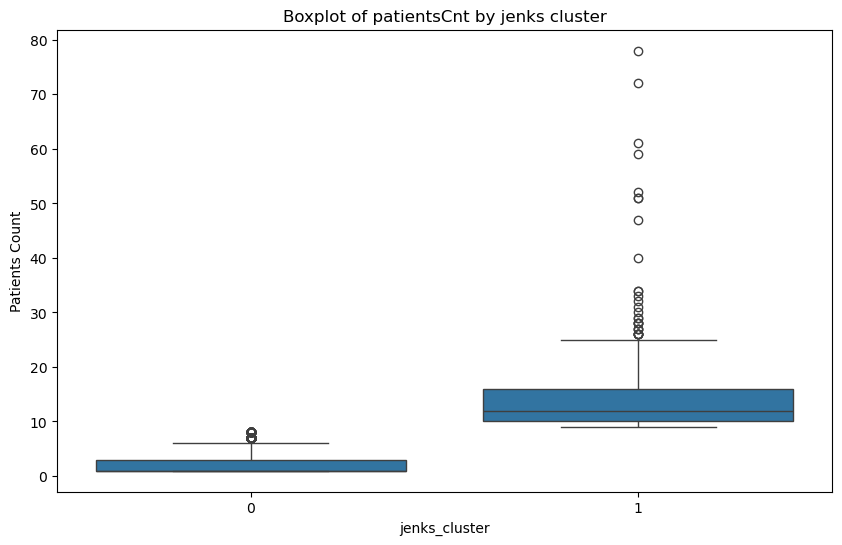

In [10]:
# 각 elbow_cluster에 해당하는 patientsCnt 값의 범위 계산
range_by_cluster = jenks_non_zero.groupby('jenks_cluster')['patientsCnt'].agg(['min', 'max', 'mean', 'count'])

# 결과 출력
print(range_by_cluster)

# Boxplot 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x='jenks_cluster', y='patientsCnt', data=jenks_non_zero)

# 그래프 제목 및 레이블 설정
plt.title('Boxplot of patientsCnt by jenks cluster')
plt.xlabel('jenks_cluster')
plt.ylabel('Patients Count')

# 그래프 출력
plt.show()

In [17]:
df_merged = df_max_ta.join(df_max_wbtemp, how='inner', lsuffix='_ta', rsuffix='_wbtemp')
df_merged = df_merged.join(df_max_tafeel, how='inner', lsuffix='_combined', rsuffix='_tafeel')
df_merged = df_merged.join(df_elbow, how='inner', lsuffix='_elbow', rsuffix='_elbow')

In [18]:
df_merged.columns

Index(['create_date_ta', 'sido_cd_ta', 'max_ta_elbow', 'patientsCnt_ta',
       'max_ta_cluster', 'create_date_wbtemp', 'sido_cd_wbtemp', 'max_wbtemp',
       'patientsCnt_wbtemp', 'max_wbtemp_cluster', 'create_date_elbow',
       'sido_cd_elbow', 'max_tafeel', 'patientsCnt_elbow',
       'max_tafeel_cluster', 'create_date_elbow', 'sido_cd_elbow',
       'tropical_3days', 'max_ta_elbow', 'agriculture_man',
       'agriculture_woman', 'patientsCnt_elbow', 'elbow_cluster'],
      dtype='object')

In [19]:
lst1=['create_date_ta', 'sido_cd_ta', 'max_ta_elbow', 'max_wbtemp', 'max_tafeel', 'agriculture_man', 'agriculture_woman', 'max_ta_cluster', 'max_wbtemp_cluster', 'max_tafeel_cluster', 'elbow_cluster']
# lst2=['create_date_ta', 'sido_cd_ta', 'max_ta_elbow', 'max_wbtemp','max_tafeel', 'ta_max_pm', 'ta_max_six_pm2', 'max_ta_cluster', 'max_wbtemp_cluster', 'max_tafeel_cluster', 'elbow_cluster']
df_cluster_merge=df_merged[lst1]
df_cluster_merge = df_cluster_merge.rename(columns={'create_date_ta': 'create_date', 'sido_cd_ta': 'sido_cd', 'max_ta_elbow': 'max_ta'})

In [20]:
df_raw['auto_binning']=0
df_raw['max_ta_cluster']=0
df_raw['max_wbtemp_cluster']=0
df_raw['max_tafeel_cluster']=0
df_raw['elbow_cluster']=0

In [21]:
df_raw.columns
lst=['sido', 'create_date', 'sido_cd', 'weekend_yn', 'grid_x', 'grid_y', 'sat_x', 'sat_y', 'min_ta', 'max_ta', 'mean_ta', 'gap_ta', 'min_tafeel', 'max_tafeel', 'mean_tafeel', 'gap_tafeel', 'min_hm', 'max_hm', 'mean_hm', 'gap_hm', 'min_wbtemp', 'max_wbtemp', 'mean_wbtemp',
    'gap_wbtemp', 'min_ws', 'max_ws', 'mean_ws', 'tropical_3days', 'heatwave_temp', 'heatalert_temp', 'ta_min_3days', 'ta_max_3days', 'gap_ta_minmax', 'popular_man', 'popular_woman', 'agriculture_man', 'agriculture_woman', 'ta_min_am', 'ta_max_am', 'ta_mean_am',
    'ta_min_pm', 'ta_max_pm', 'ta_mean_pm', 'ta_min_six_am1', 'ta_max_six_am1', 'ta_mean_six_am1', 'ta_min_six_am2', 'ta_max_six_am2','ta_mean_six_am2', 'ta_min_six_pm1', 'ta_max_six_pm1', 'ta_mean_six_pm1', 'ta_min_six_pm2', 'ta_max_six_pm2',
    'ta_mean_six_pm2', 'patientsCnt','auto_binning', 'max_ta_cluster', 'max_wbtemp_cluster', 'max_tafeel_cluster', 'elbow_cluster', 'instDate', 'updtDate']

In [22]:
# df_cluster_merge.to_csv('knn_clustering.csv', index=False)

In [23]:
df_clustering_set=df_raw[lst]
df_clustering_set.fillna(value='NA', inplace=True)

In [24]:
print(df_clustering_set.shape)
print(df_cluster_merge.shape)

(26010, 63)
(6036, 12)


In [25]:
# 데이터프레임을 인덱스 설정
df_clustering_set.set_index(['create_date', 'sido_cd'], inplace=True)
df_cluster_merge.set_index(['create_date', 'sido_cd'], inplace=True)

In [26]:
# 업데이트할 열 목록
columns_to_update = ['max_ta_cluster', 'max_wbtemp_cluster', 'max_tafeel_cluster', 'elbow_cluster']

# df2의 값으로 df1 업데이트
df_clustering_set.update(df_cluster_merge[columns_to_update])
# 데이터프레임의 데이터 타입 확인 및 변환 (필요시)
df_clustering_set = df_clustering_set.astype(str)

df_clustering_set

sido weekend_yn grid_x grid_y sat_x sat_y min_ta  \
create_date sido_cd                                                        
2014-05-01  31           경기도          0     60    120    NA    NA    9.6   
            33          충청북도          0     69    107    NA    NA   10.5   
            22         대구광역시          0     89     90    NA    NA   13.5   
            35       전북특별자치도          0     63     89    NA    NA   10.2   
            37          경상북도          0     89     91    NA    NA   13.3   
...                      ...        ...    ...    ...   ...   ...    ...   
2023-09-30  21         부산광역시          1     98     76    NA    NA   16.8   
            24         광주광역시          1     58     74    NA    NA   15.2   
            26         울산광역시          1    102     84    NA    NA   15.5   
            38          경상남도          1     91     77    NA    NA   18.3   
            23         인천광역시          1     55    124    NA    NA   18.9   

                    max_ta mean_ta gap_ta  ... ta_max_six_pm2 ta_mean_six_pm2  \
create_date sido_cd                        ...                                  
2014-05-01  31        24.2    16.6   14.6  ...             21              17   
            33        23.7    17.1   13.2  ...             22              18   
            22        25.3    19.0   11.8  ...             24              20   
            35        23.6    16.2   13.4  ...             21              16   
            37        25.3    19.3   12.0  ...             24              21   
...                    ...     ...    ...  ...            ...             ...   
2023-09-30  21        22.7    20.5    5.9  ...             20              20   
            24        23.6    19.3    8.4  ...             21              19   
            26        24.1    19.6    8.6  ...             21              19   
            38        25.5    21.5    7.2  ...             22              19   
            23        23.3    21.5    4.4  ...             21              20   

                    patientsCnt auto_binning max_ta_cluster  \
create_date sido_cd                                           
2014-05-01  31                0            0              0   
            33                0            0              0   
            22                0            0              0   
            35                0            0              0   
            37                0            0              0   
...                         ...          ...            ...   
2023-09-30  21                0            0              0   
            24                0            0              0   
            26                0            0              0   
            38                0            0              0   
            23                0            0              0   

                    max_wbtemp_cluster max_tafeel_cluster elbow_cluster  \
create_date sido_cd                                                       
2014-05-01  31                       0                  0             0   
            33                       0                  0             0   
            22                       0                  0             0   
            35                       0                  0             0   
            37                       0                  0             0   
...                                ...                ...           ...   
2023-09-30  21                       0                  0             0   
            24                       0                  0             0   
            26                       0                  0             0   
            38                       0                  0             0   
            23                       0                  0             0   

                       instDate    updtDate  
create_date sido_cd                          
2014-05-01  31       2024-07-31  2024-07-31  
            33       2024-07-31  2024-07-31  
 

In [33]:
# df_clustering_set.to_csv('D:/Work/002.code/jupyterNotebook/data/HEAT_TARGET/T_PATIENTS_DAILY_WHOLE_CLUSTERING_0812_v01.csv', encoding='utf-8-sig')

In [27]:
# df_clustering_set.to_csv('D:/Work/002.code/jupyterNotebook/data/HEAT_TARGET/T_PATIENTS_DAILY_WHOLE_CLUSTERING_0812_v02.csv', encoding='utf-8-sig')

In [27]:
# df_clustering_set.to_csv('D:/Work/002.code/jupyterNotebook/data/HEAT_TARGET/T_PATIENTS_DAILY_WHOLE_CLUSTERING_0812_v03.csv', encoding='utf-8-sig')

### k=2 Clustering을 위한 군집비교

In [3]:
path='D:/Work/002.code/jupyterNotebook/data/HEAT_TARGET/T_PATIENTS_DAILY_WHOLE_CLUSTERING_0812_v03.csv'
df=pd.read_csv(path)
df.head(2)

create_date  sido_cd  sido  weekend_yn  grid_x  grid_y  sat_x  sat_y  \
0  2014-05-01       31   경기도           0      60     120    NaN    NaN   
1  2014-05-01       33  충청북도           0      69     107    NaN    NaN   

   min_ta  max_ta  ...  ta_max_six_pm2  ta_mean_six_pm2  patientsCnt  \
0     9.6    24.2  ...              21               17            0   
1    10.5    23.7  ...              22               18            0   

   auto_binning  max_ta_cluster  max_wbtemp_cluster  max_tafeel_cluster  \
0             0               0                   0                   0   
1             0               0                   0                   0   

   elbow_cluster    instDate    updtDate  
0              0  2024-07-31  2024-07-31  
1              0  2024-07-31  2024-07-31  

[2 rows x 63 columns]

In [4]:
features=['min_ta', 'max_ta', 'mean_ta', 'gap_ta', 'min_tafeel', 'max_tafeel', 'mean_tafeel', 'gap_tafeel', 'min_hm', 'max_hm', 'mean_hm', 'gap_hm', 'min_wbtemp', 'max_wbtemp', 'mean_wbtemp', 'gap_wbtemp', 'min_ws', 'max_ws', 'mean_ws', 'tropical_3days',
       'heatwave_temp', 'heatalert_temp', 'ta_min_3days', 'ta_max_3days', 'gap_ta_minmax', 'popular_man', 'popular_woman', 'agriculture_man', 'agriculture_woman', 'ta_min_am', 'ta_max_am', 'ta_mean_am', 'ta_min_pm', 'ta_max_pm', 'ta_mean_pm', 'ta_min_six_am1',
       'ta_max_six_am1', 'ta_mean_six_am1', 'ta_min_six_am2', 'ta_max_six_am2', 'ta_mean_six_am2', 'ta_min_six_pm1', 'ta_max_six_pm1', 'ta_mean_six_pm1', 'ta_min_six_pm2', 'ta_max_six_pm2', 'ta_mean_six_pm2']

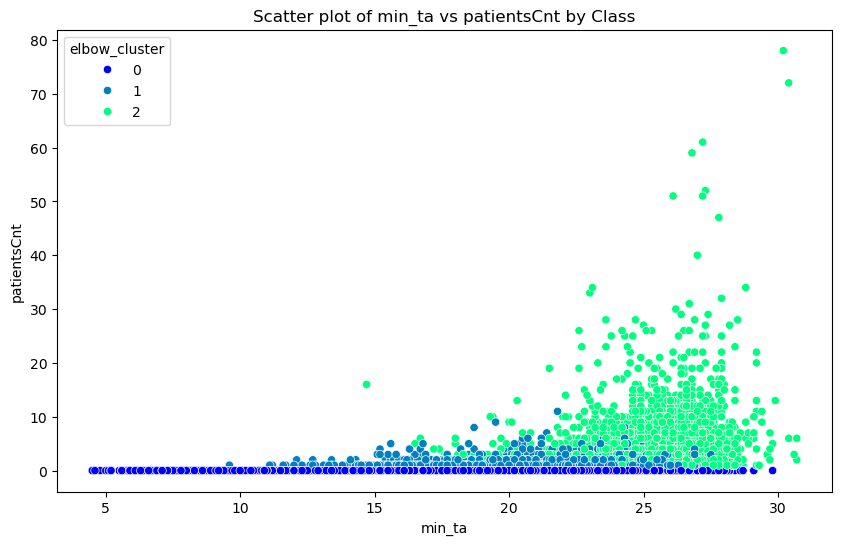

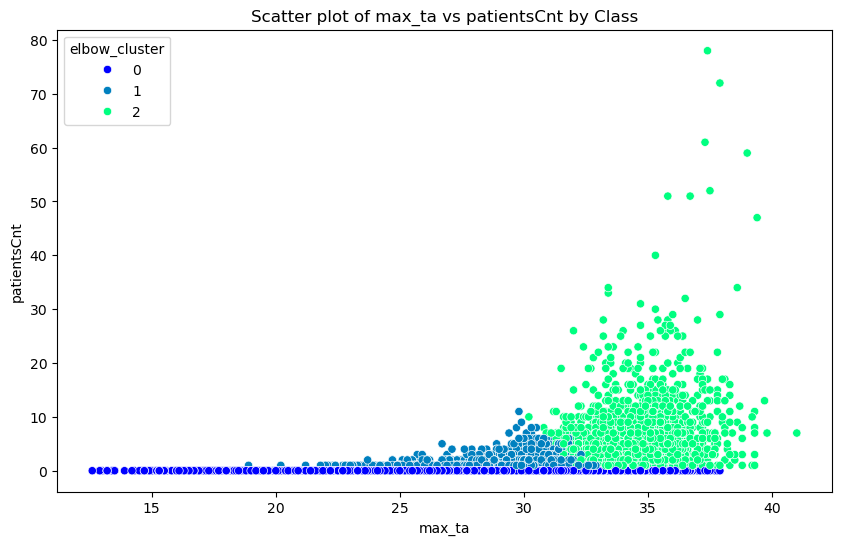

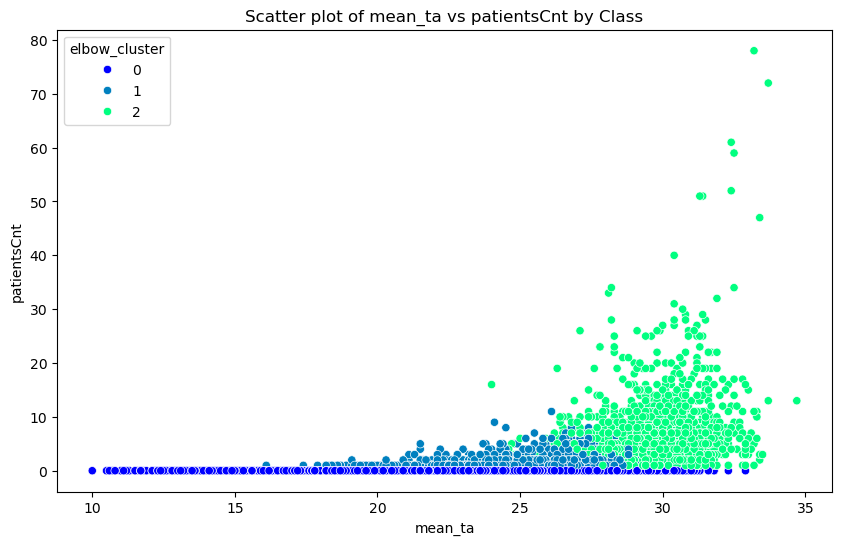

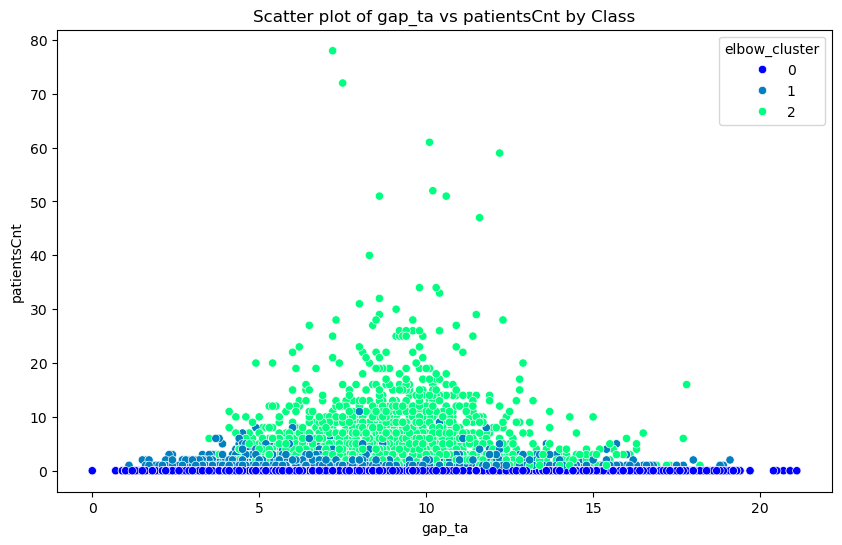

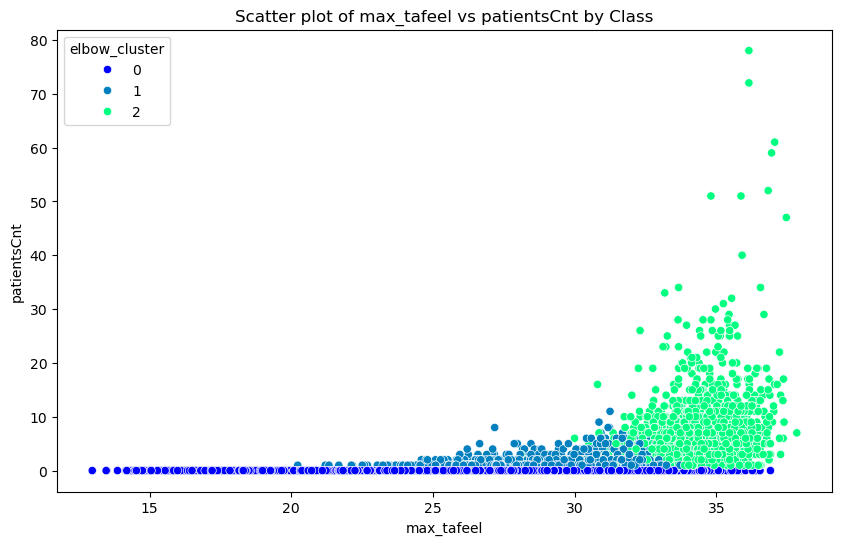

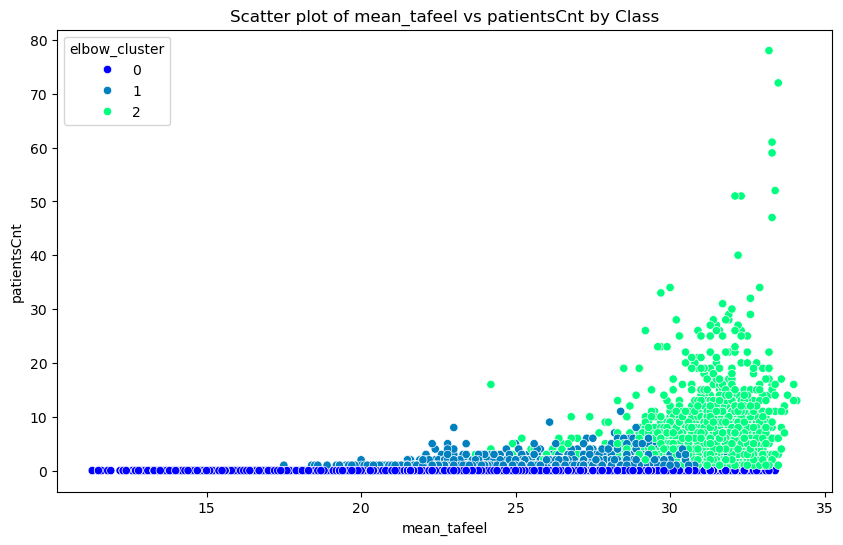

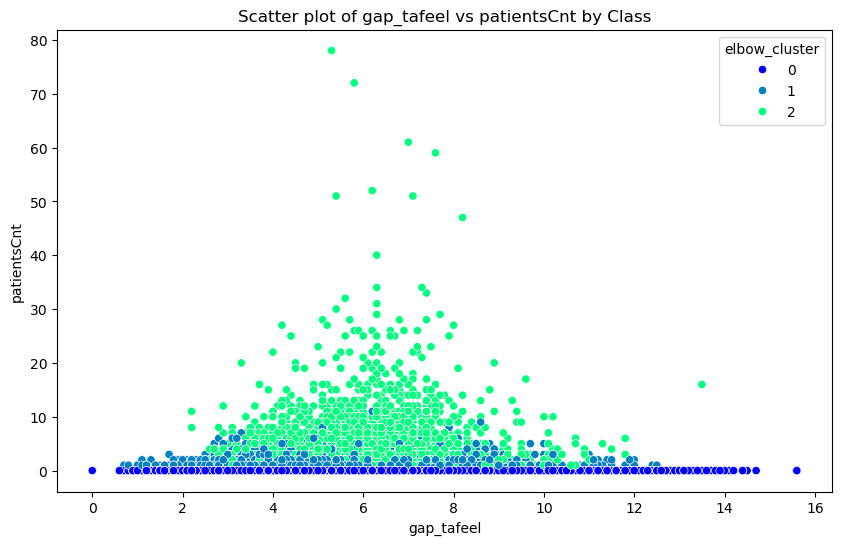

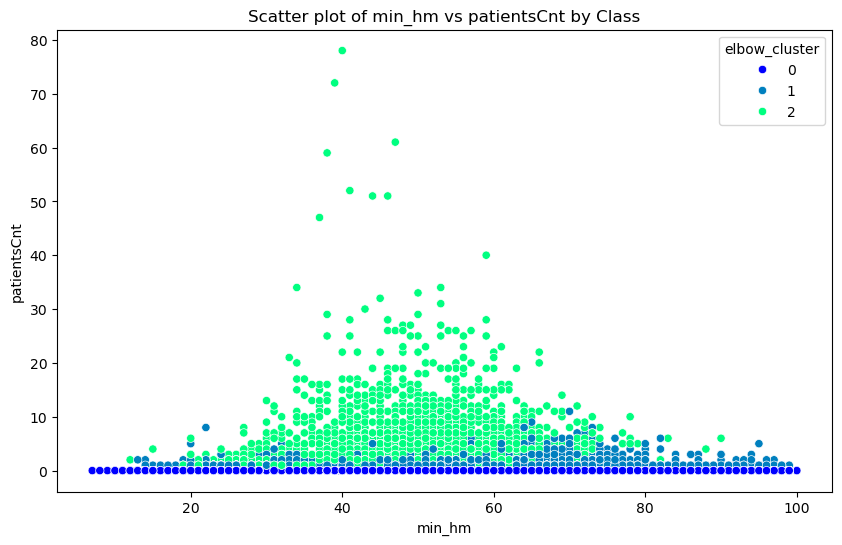

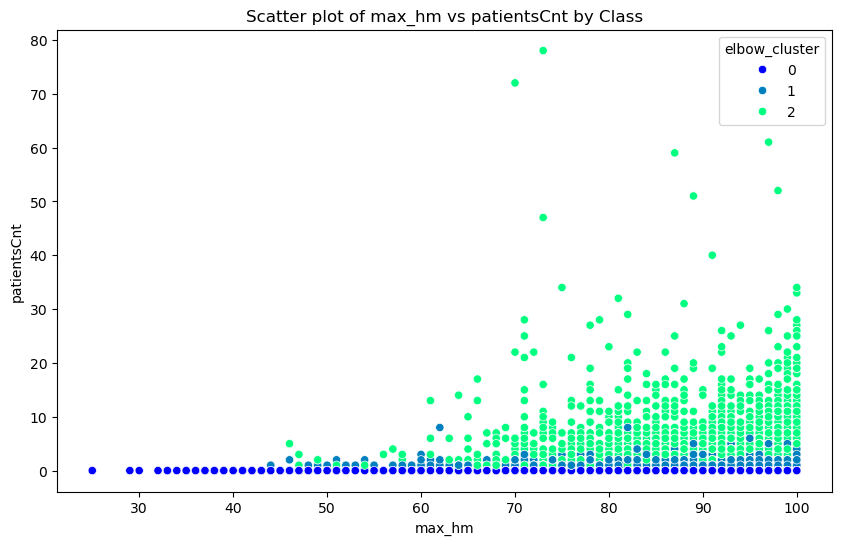

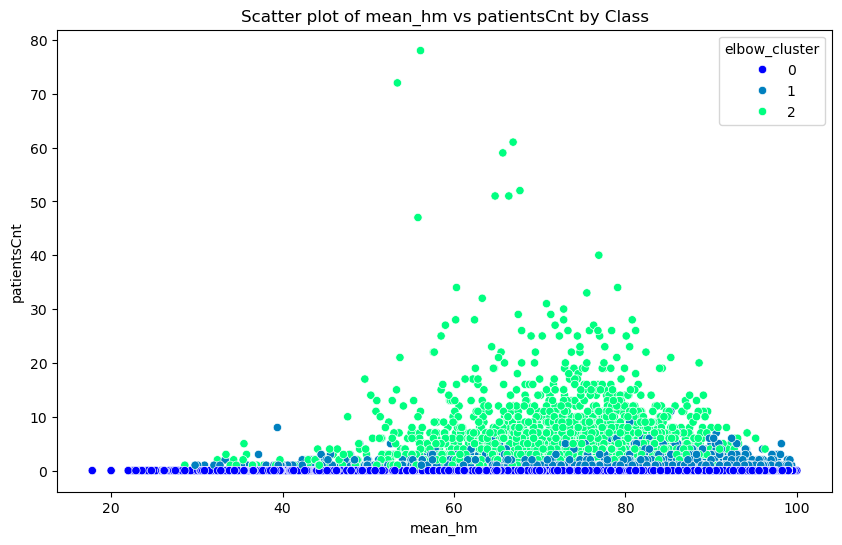

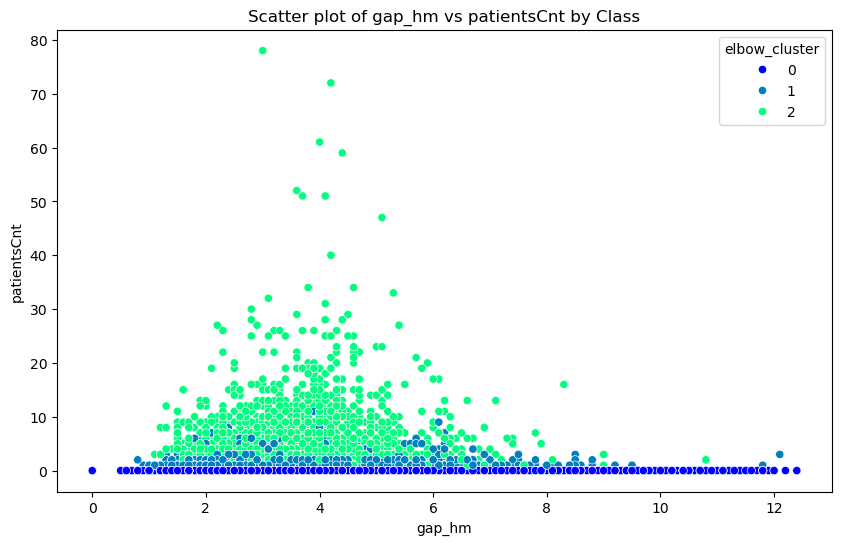

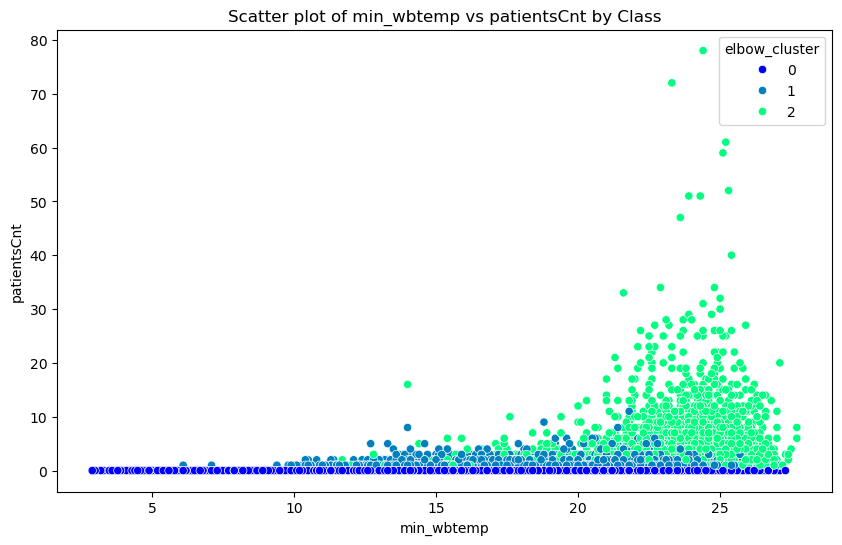

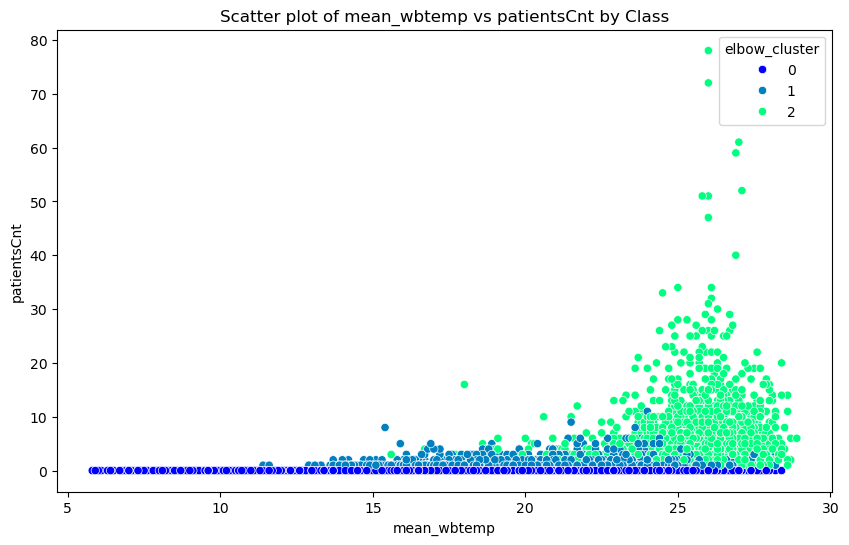

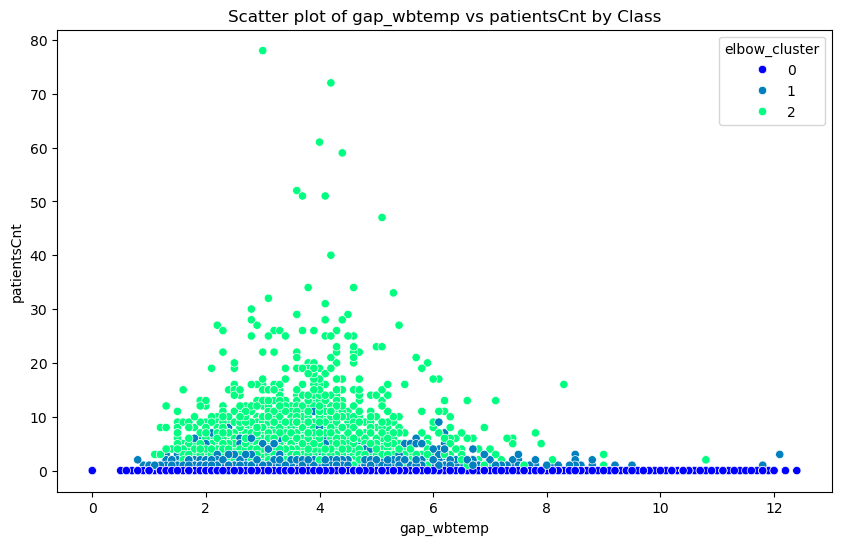

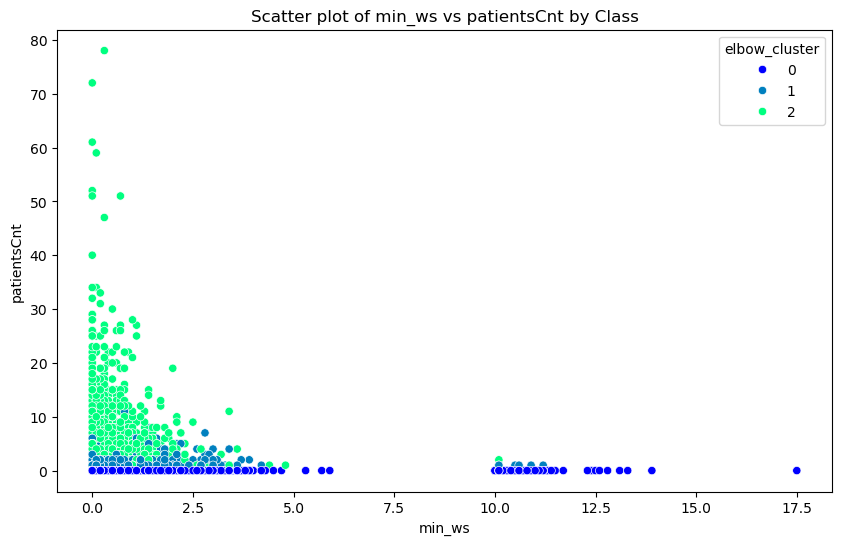

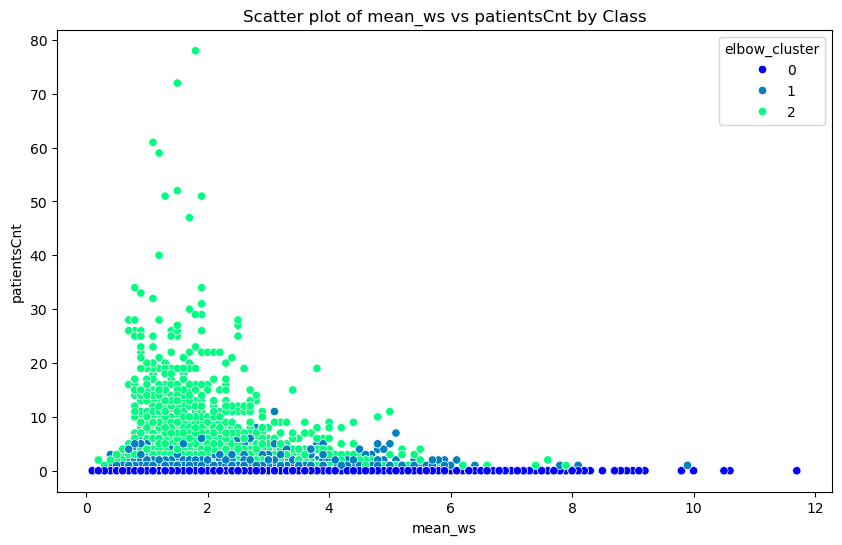

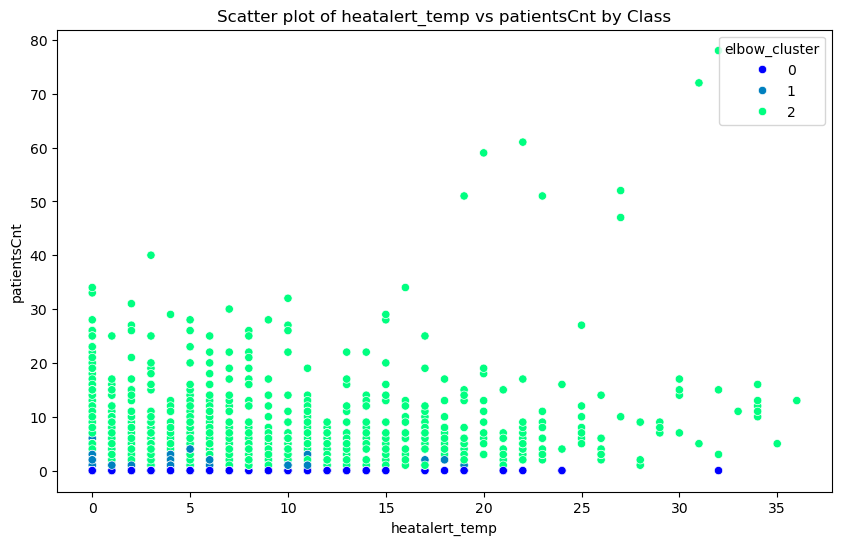

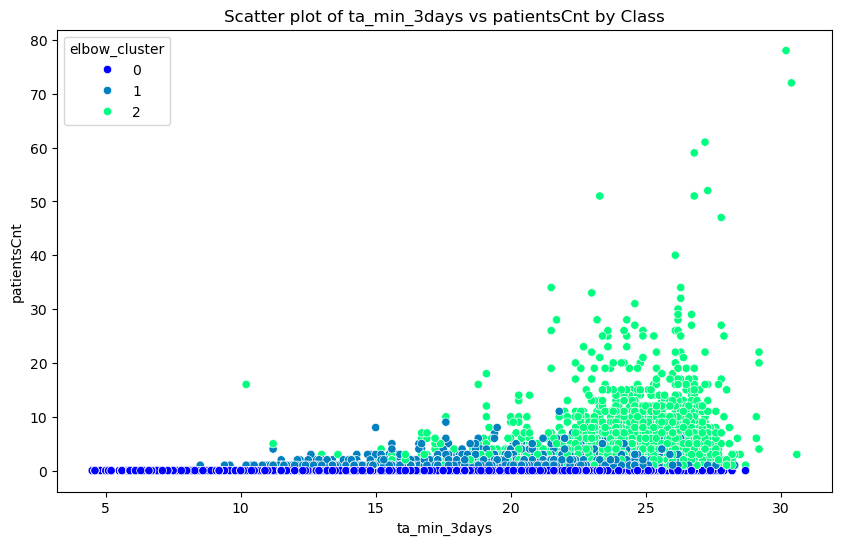

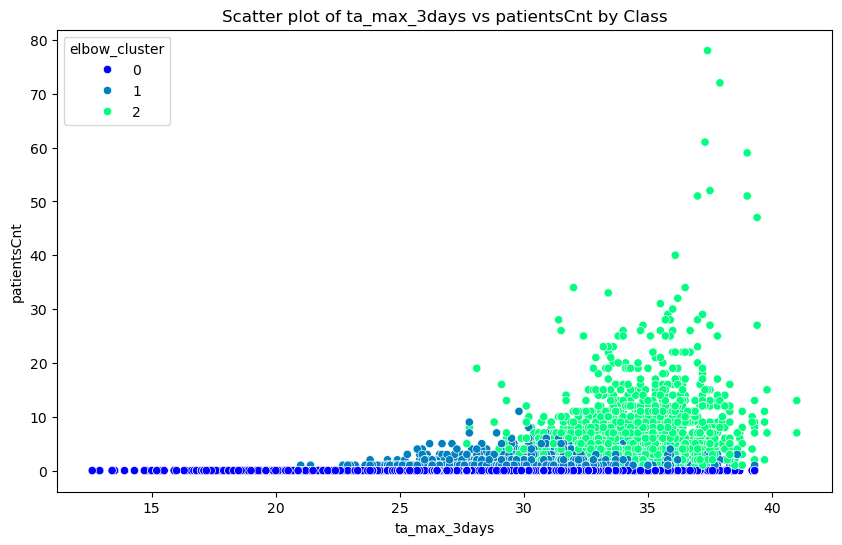

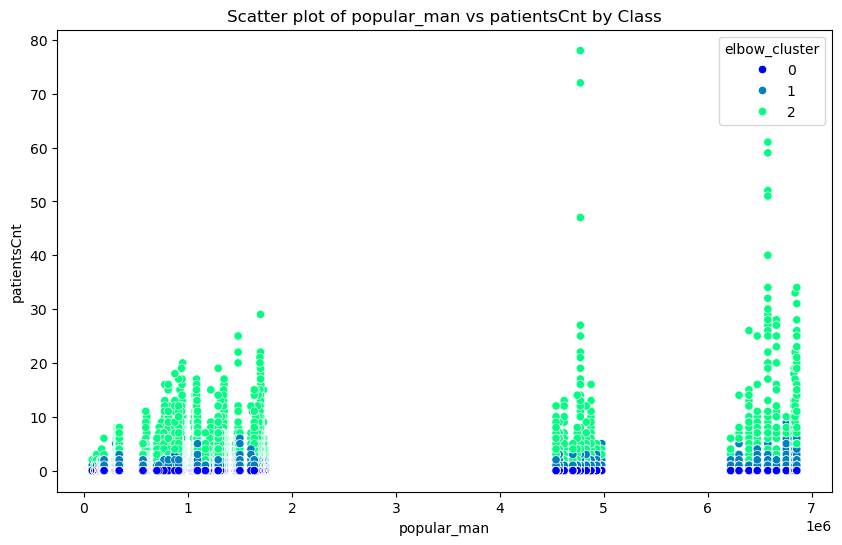

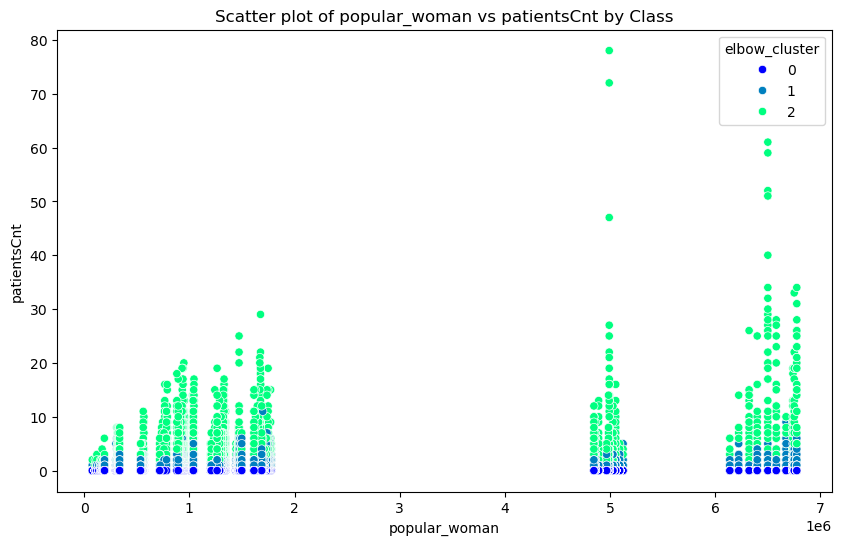

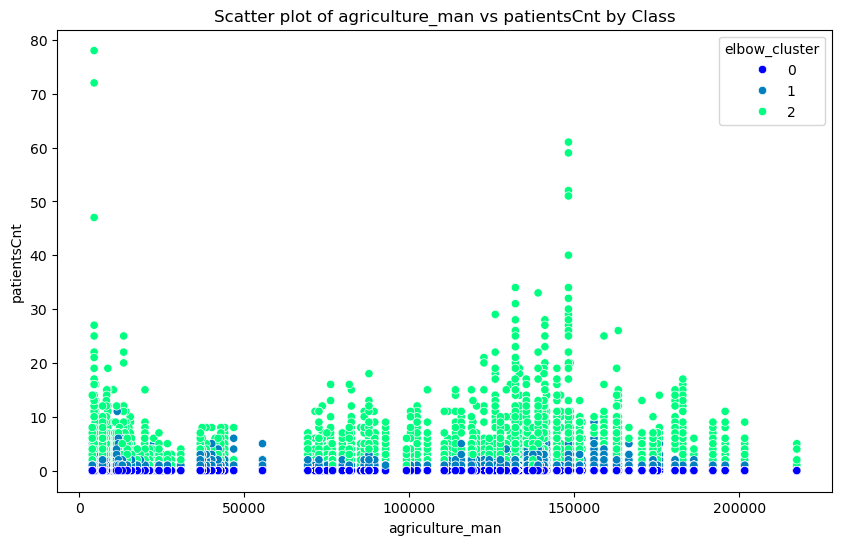

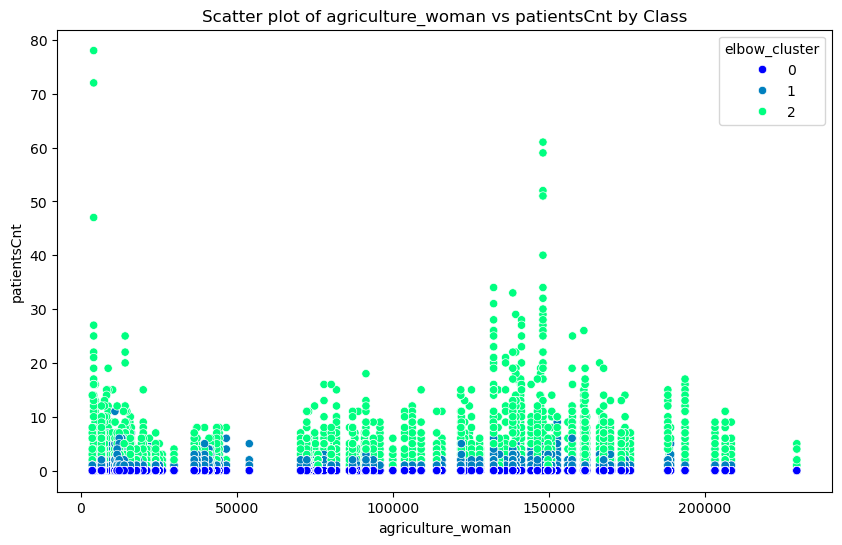

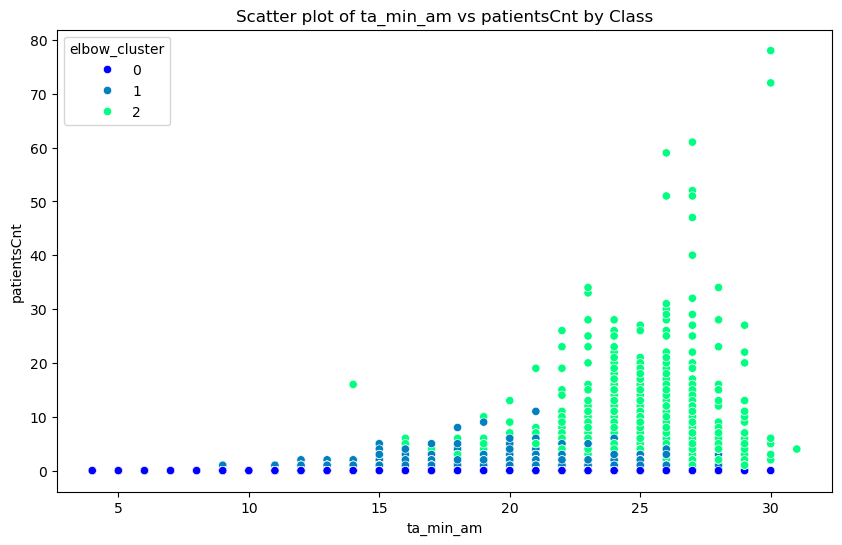

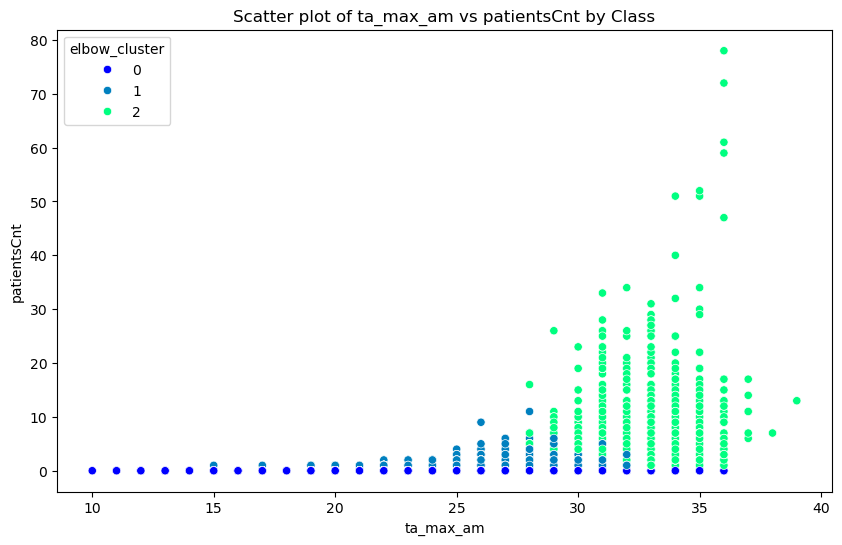

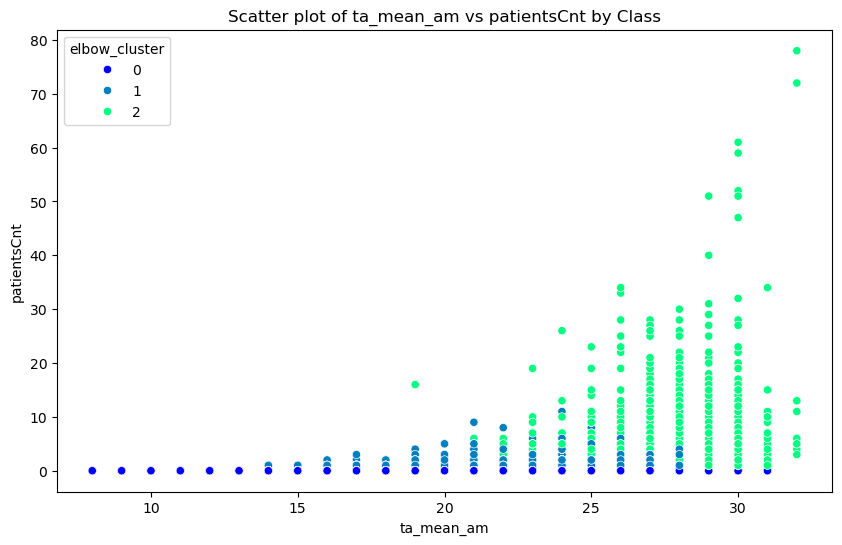

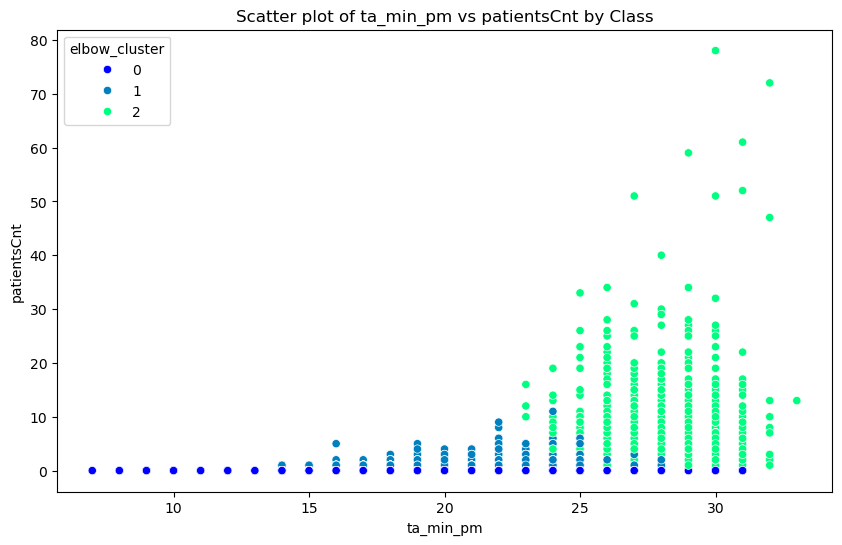

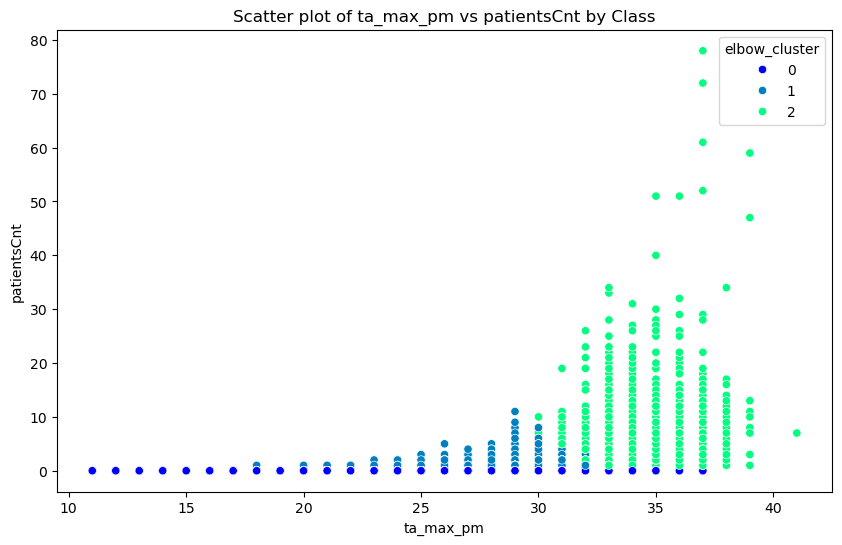

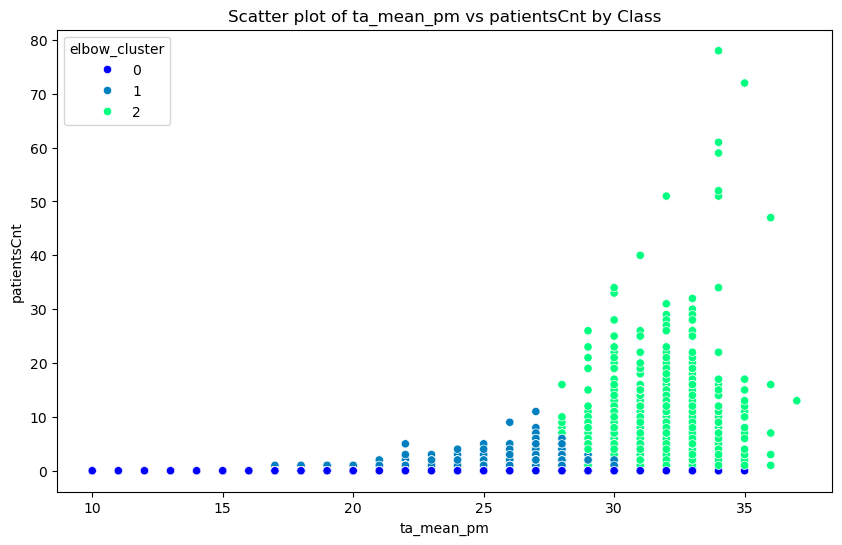

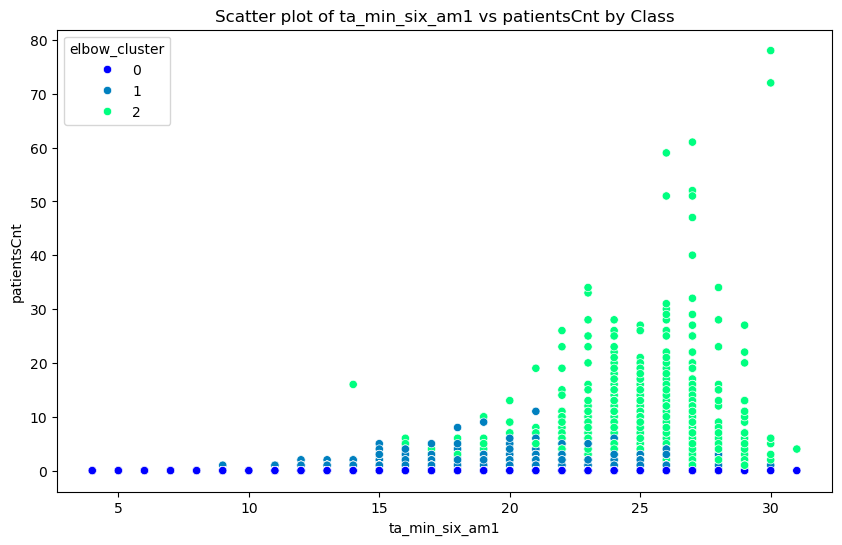

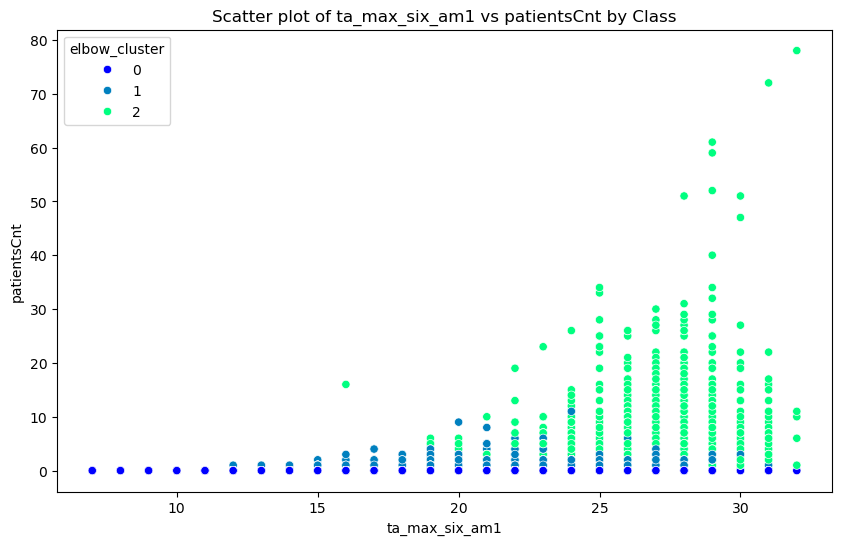

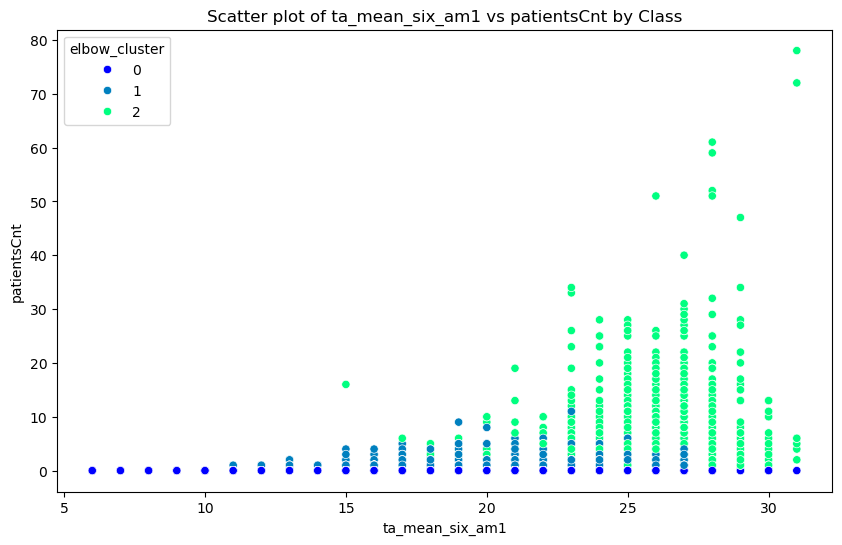

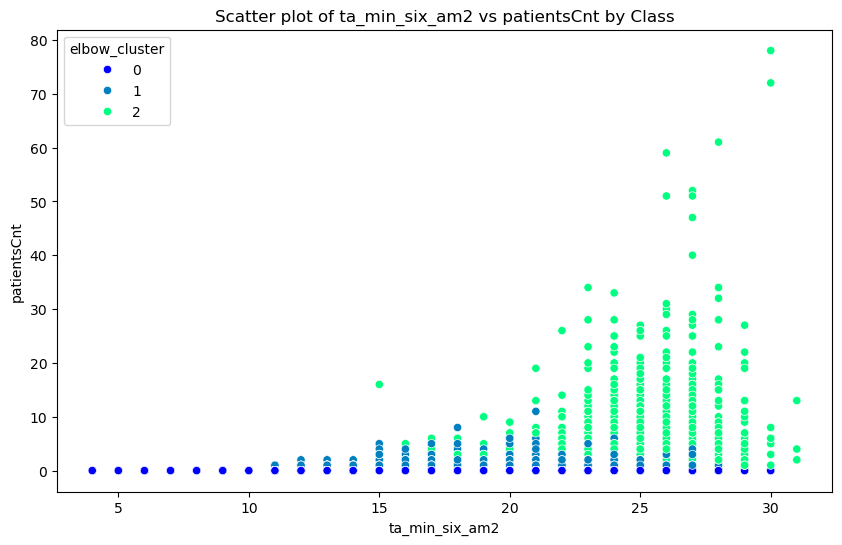

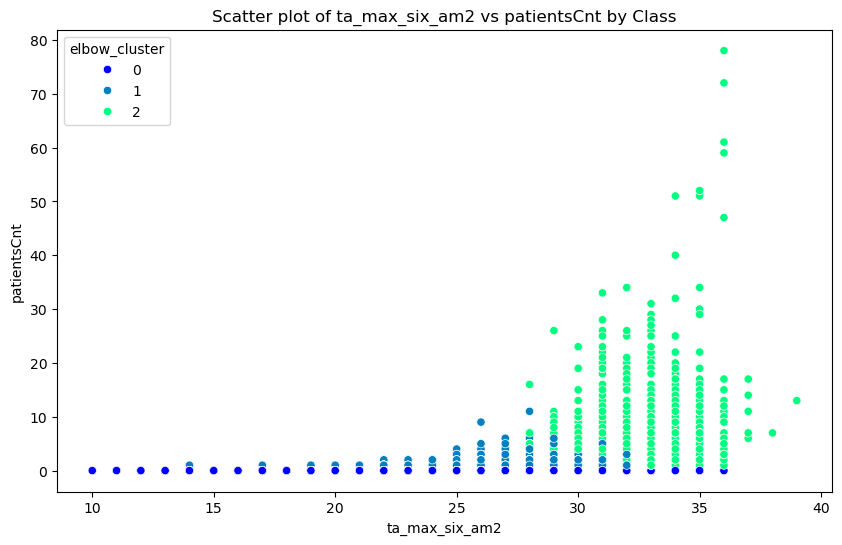

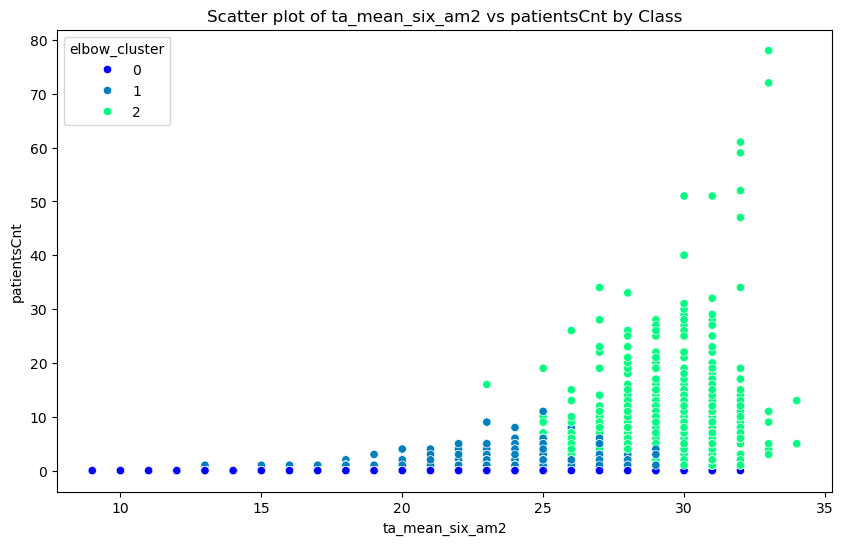

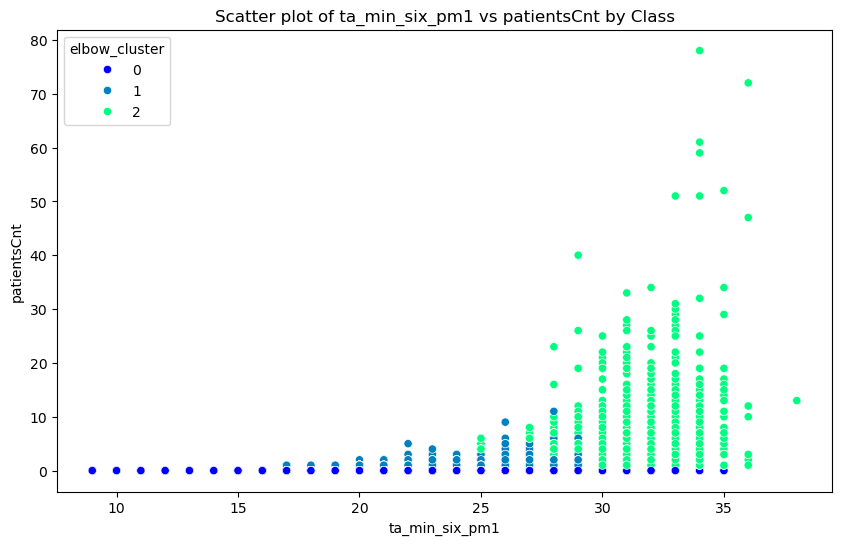

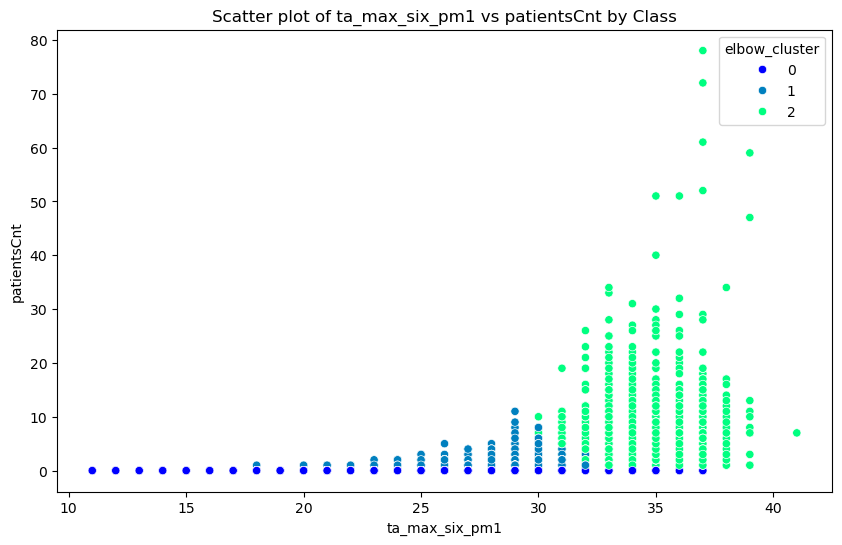

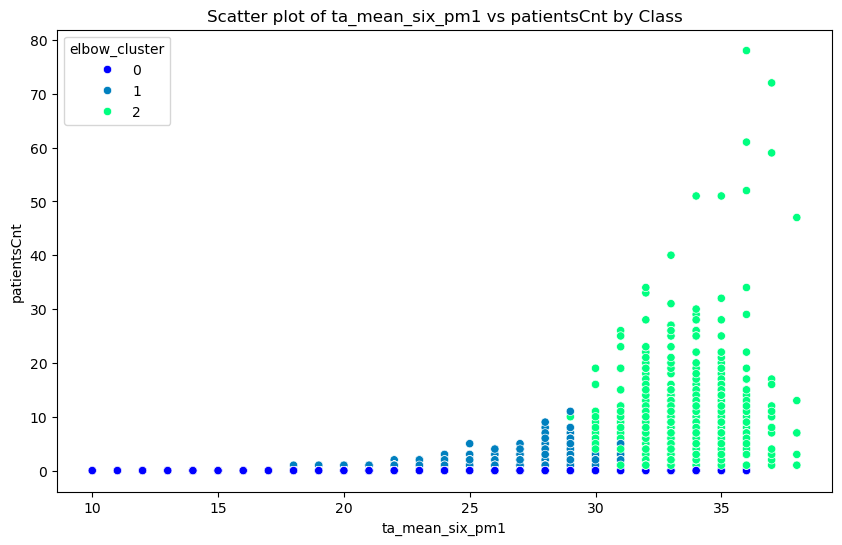

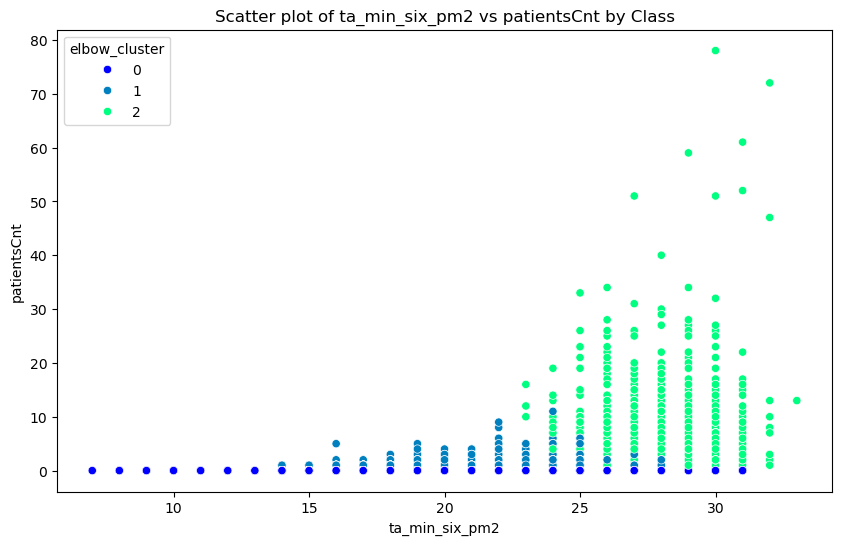

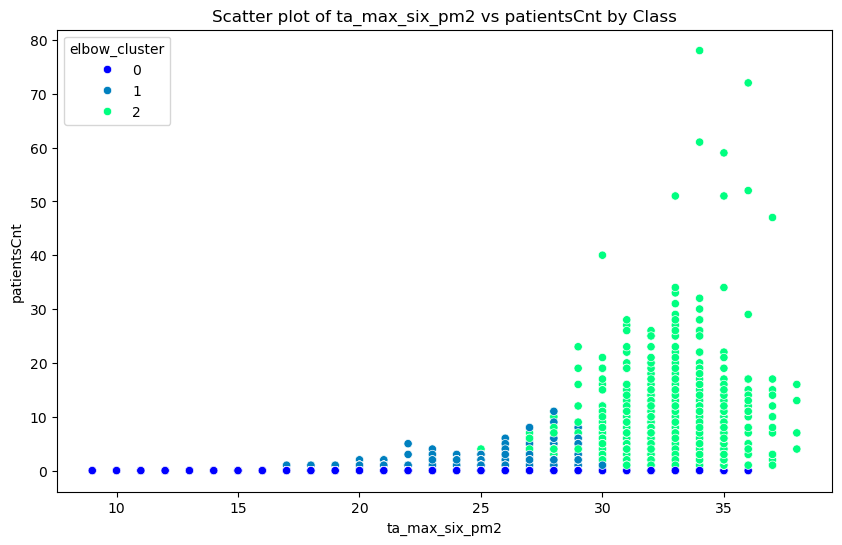

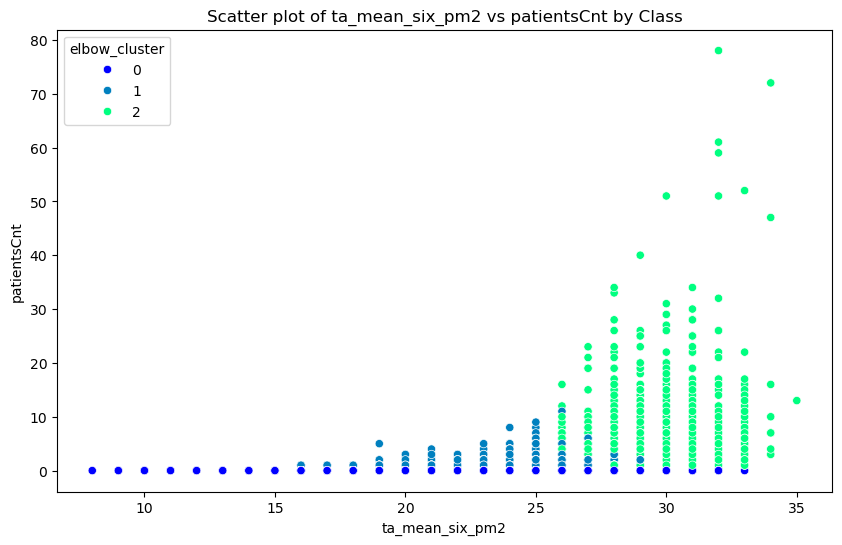

In [5]:
# for문을 통해 각 feature에 대해 산점도 그리기
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=feature, y='patientsCnt', hue='elbow_cluster', palette='winter')
    
    # 그래프 제목 및 레이블 설정
    plt.title(f'Scatter plot of {feature} vs patientsCnt by Class')
    plt.xlabel(feature)
    plt.ylabel('patientsCnt')
    
    # 그래프 출력
    plt.show()

               min  max      mean
elbow_cluster                    
0                0    0  0.000000
1                1   78  2.422757
2                1   61  3.953180
3                1   18  2.734604


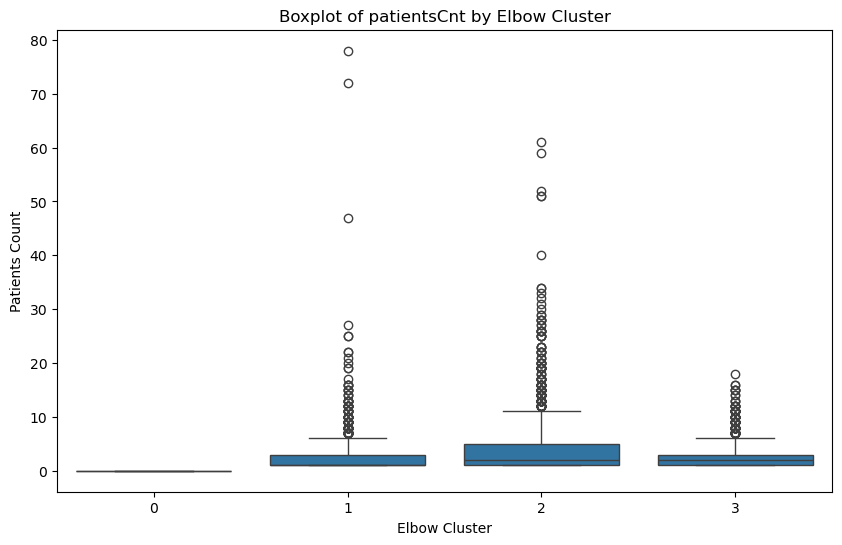

In [32]:
# 각 elbow_cluster에 해당하는 patientsCnt 값의 범위 계산
range_by_cluster = df.groupby('elbow_cluster')['patientsCnt'].agg(['min', 'max', 'mean'])

# 결과 출력
print(range_by_cluster)

# Boxplot 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x='elbow_cluster', y='patientsCnt', data=df)

# 그래프 제목 및 레이블 설정
plt.title('Boxplot of patientsCnt by Elbow Cluster')
plt.xlabel('Elbow Cluster')
plt.ylabel('Patients Count')

# 그래프 출력
plt.show()

### Natural Break

In [5]:
df.head(2)

create_date  sido_cd  sido  weekend_yn  grid_x  grid_y  sat_x  sat_y  \
0  2014-05-01       31   경기도           0      60     120    NaN    NaN   
1  2014-05-01       33  충청북도           0      69     107    NaN    NaN   

   min_ta  max_ta  ...  ta_max_six_pm2  ta_mean_six_pm2  patientsCnt  \
0     9.6    24.2  ...              21               17            0   
1    10.5    23.7  ...              22               18            0   

   auto_binning  max_ta_cluster  max_wbtemp_cluster  max_tafeel_cluster  \
0             0               0                   0                   0   
1             0               0                   0                   0   

   elbow_cluster    instDate    updtDate  
0              0  2024-07-31  2024-07-31  
1              0  2024-07-31  2024-07-31  

[2 rows x 63 columns]